# Library ggplot
There are four components of ggplot2 on the graph, namely plot, data, aesthetic mapping and layer.

Plot : The earliest is the existence of a blank plot or "canvas" on which various charts can be "drawn" on it.

Data and Aesthetic Mapping : Before being drawn, this canvas certainly needs to have data to display.

Layer : Layers are graph objects themselves. As the name implies, the objects are arranged in the form of layers (layers).
Each layer has the following objects:

Geom: Geometry shapes such as lines (lines), bars (bars), points (points), and others.

Stat: Or a function to perform a statistical transformation of the input data.
The simplest example is the transformation of data for soul density from numbers to range or inverges per five thousand. So the input data with the number 8041 is changed to an interval of numbers 8001-8500. This transformation is called bin.

Position: The position of some data that has the same value. If it is plotted as a scatter plot for example, of course the data will accumulate at one point. Do certain random values need to be added so that just as they are drawn, the data is more scattered? If so, then this is jitter. If we don't want to change anything, this is called identity.


In [10]:
library("ggplot2")


### Empty Canvas

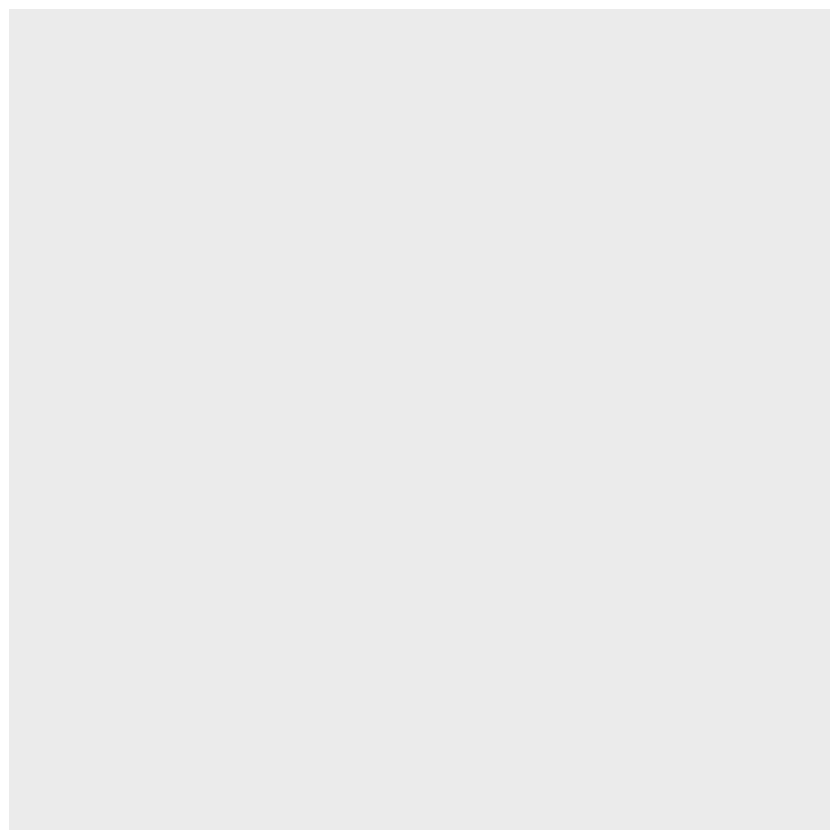

In [4]:
 ggplot()

### Add Title

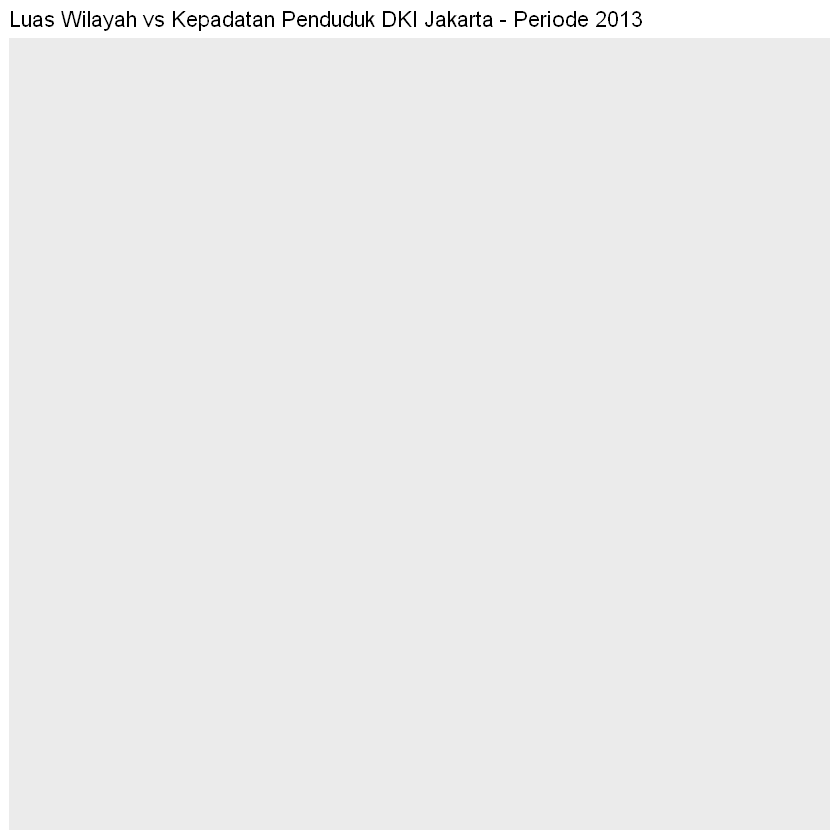

In [5]:
ggplot() + labs(title="Luas Wilayah vs Kepadatan Penduduk DKI Jakarta - Periode 2013")

### Add Labels on the X and Y Axes

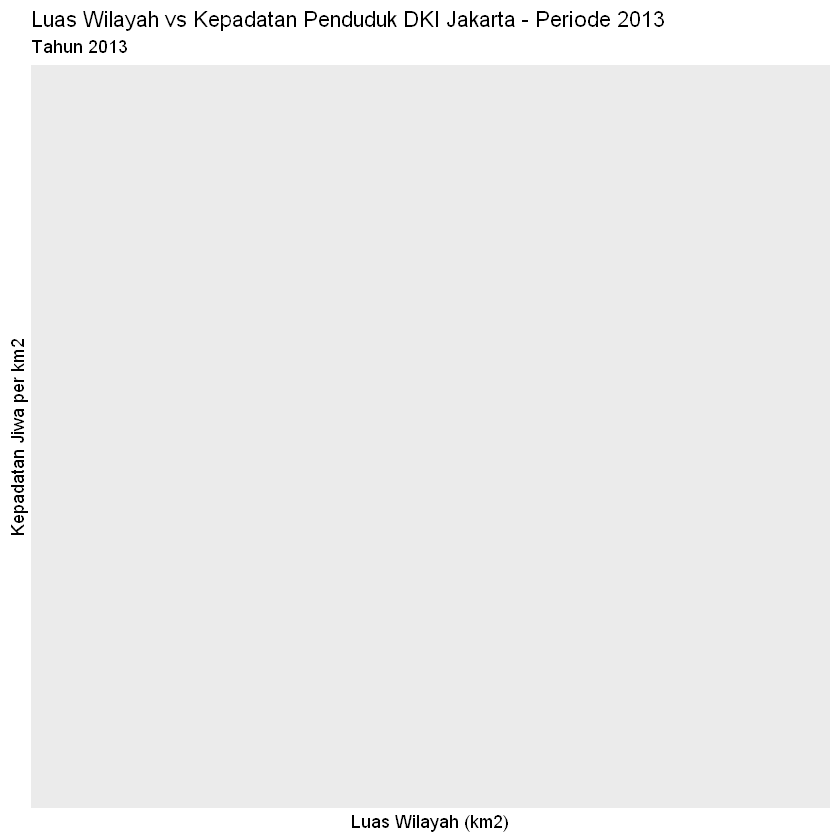

In [6]:
plot.jakarta <- ggplot()
plot.jakarta <- plot.jakarta + labs(title="Luas Wilayah vs Kepadatan Penduduk DKI Jakarta - Periode 2013", subtitle="Tahun 2013")
plot.jakarta <- plot.jakarta + labs(x="Luas Wilayah (km2)", y="Kepadatan Jiwa per km2")
plot.jakarta


### Summary function for ggplot objects
Not every time we have to analyze the plot and its components in a way that is displayed. When it is stored in a variable, we can see the details in textual form using the summary function.


In [7]:
summary(plot.jakarta)

data: [x]
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>


### Pass Data to ggplot

In [25]:
penduduk.dki <- read.csv("C:\\Users\\aftermath\\Documents\\CS-101\\R\\asset\\dkikepadatankelurahan2013.csv", sep=",")
head(penduduk.dki[c("NAMA.KELURAHAN","LUAS.WILAYAH..KM2.")],5)

NAMA.KELURAHAN,LUAS.WILAYAH..KM2.
P. PANGGANG,0.91
P. KELAPA,3.76
P. HARAPAN,3.59
P. UNTUNG JAWA,0.59
P. TIDUNG,1.57


In [12]:
plot.dki <- ggplot(data = penduduk.dki)
summary(plot.dki)

data: TAHUN, NAMA.PROVINSI, NAMA.KABUPATEN.KOTA, NAMA.KECAMATAN,
  NAMA.KELURAHAN, LUAS.WILAYAH..KM2., KEPADATAN..JIWA.KM2., X, X.1,
  X.2, X.3, X.4, X.5, X.6, X.7, X.8, X.9, X.10, X.11, X35.39.Laki.Laki,
  X35.39.Perempuan, X40.44.Laki.Laki, X40.44.Perempuan,
  X45.49.Laki.Laki, X45.49.Perempuan, X50.54.Laki.Laki,
  X50.54.Perempuan, X55.59.Laki.Laki, X55.59.Perempuan,
  X60.64.Laki.Laki, X60.64.Perempuan, X65.69.Laki.Laki,
  X65.69.Perempuan, X70.74.Laki.Laki, X70.74.Perempuan, X.75.Laki.Laki,
  X.75..Perempuan [267x37]
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>


### Mapping x, y and color with the aes function

In [15]:
plot.dki <- ggplot(data=penduduk.dki, aes(color = NAMA.KABUPATEN.KOTA, x = LUAS.WILAYAH..KM2., y = KEPADATAN..JIWA.KM2.))
summary(plot.dki)

data: TAHUN, NAMA.PROVINSI, NAMA.KABUPATEN.KOTA, NAMA.KECAMATAN,
  NAMA.KELURAHAN, LUAS.WILAYAH..KM2., KEPADATAN..JIWA.KM2., X, X.1,
  X.2, X.3, X.4, X.5, X.6, X.7, X.8, X.9, X.10, X.11, X35.39.Laki.Laki,
  X35.39.Perempuan, X40.44.Laki.Laki, X40.44.Perempuan,
  X45.49.Laki.Laki, X45.49.Perempuan, X50.54.Laki.Laki,
  X50.54.Perempuan, X55.59.Laki.Laki, X55.59.Perempuan,
  X60.64.Laki.Laki, X60.64.Perempuan, X65.69.Laki.Laki,
  X65.69.Perempuan, X70.74.Laki.Laki, X70.74.Perempuan, X.75.Laki.Laki,
  X.75..Perempuan [267x37]
mapping:  x = ~LUAS.WILAYAH..KM2., y = ~KEPADATAN..JIWA.KM2., colour = ~NAMA.KABUPATEN.KOTA
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    var

### Layer
To draw the actual graph on ggplot, we add what is called a layer. Layers can be generated using the layer function with the following syntax:
<pre>
    layer(geom = "…", stat = "…", position = "…")
</pre>
<table class="table table-striped table-bordered" style="font-size: 0.9em">
 <thead>
    <tr>
      <td width="217">
        <p>Komponen</p>
      </td>
      <td>
        <p>Deskripsi</p>
      </td>
    </tr>
 </thead>
  <tbody>
    <tr>
      <td width="217">
        <p>Layer</p>
      </td>
      <td>
        <p>Function yang digunakan untuk membentuk layer untuk ditambahkan pada plot</p>
      </td>
    </tr>
    <tr>
      <td width="217">
        <p>geom</p>
      </td>
      <td>
        Bentuk geometri yang digunakan untuk layer. Beberapa daftar geometri yang bisa diberikan adalah sebagai berikut:
       <ul>
        <li><strong>point</strong>: untuk menggambar grafik berupa titik yang menunjukkan hubungan antar variable atau <i>scatter plot</i></li>
        <li><strong>line</strong>: diagram garis</li>
        <li><strong>hline</strong>: diagram garis horizontal</li>
        <li><strong>bar</strong>: diagram batang</li>
        <li><strong>histogram</strong>: histogram</li>
        <li>dll<p></p>
       </li></ul>
      </td>
    </tr>
    <tr>
      <td width="217">
        <p>stat</p>
      </td>
      <td>
        Jenis transformasi untuk merubah data dari bentuk asli ke bentuk lain. Beberapa daftar stat yang bisa digunakan antara lain adalah sebagai berikut:
        <ul>
        <li><strong>identity</strong>: tidak melakukan transformasi</li>
        <li><strong>bin</strong>: membagi data menjadi interval</li>
        <li><strong>sum</strong>: menjumlahkan nilai-nilai yang unik</li>
        <li><strong>summary</strong>: melakukan summary dari semua nilai y untuk setiap titik data x</li>
        <li>dll</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td width="217">
        <p>position</p>
      </td>
      <td>
        Perubahan posisi terhadap tiap titik yang terdapat pada layer. Beberapa daftar position yang bisa digunakan antara lain adalah sebagai berikut:
        <ul>
        <li><strong>identity</strong>: tidak ada perubahan posisi</li>
        <li><strong>jitter</strong>: merubah posisi dengan jarak acak tertentu dari posisi awal, ini digunakan untuk memberi kejelasan jika banyak titik yang <em>overlapping</em> (saling tindih)</li>
        <li><strong>stack</strong>: menyusun posisi dalam bentuk tumpukan</li>
        <li>dll</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

### Scatter Plot

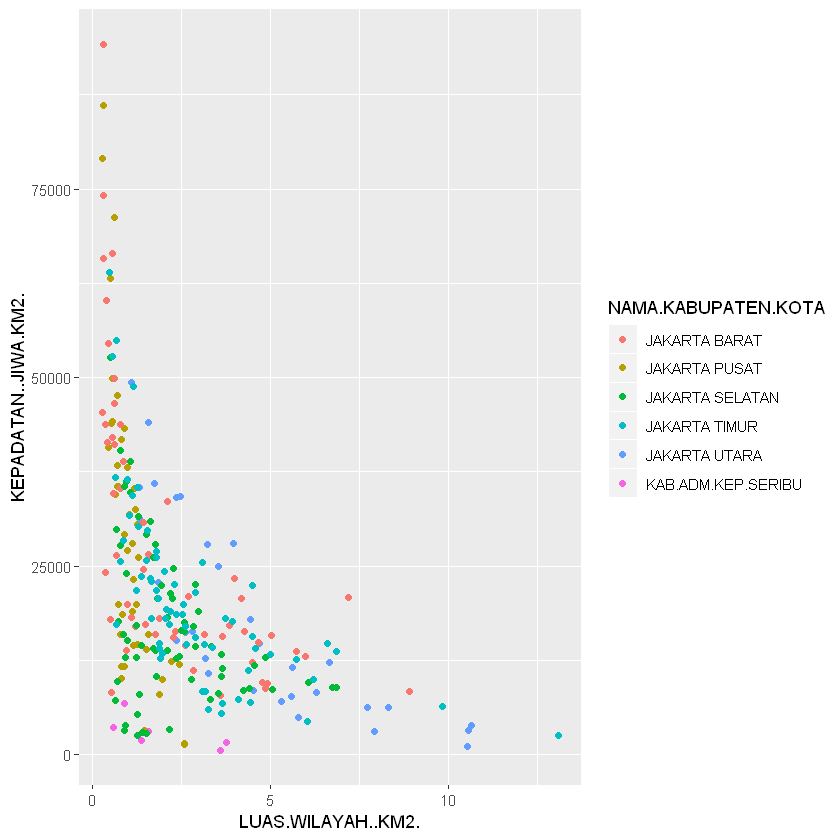

In [16]:
plot.dki + layer(geom = "point", stat = "identity", position = "identity")

### Add Title and Label

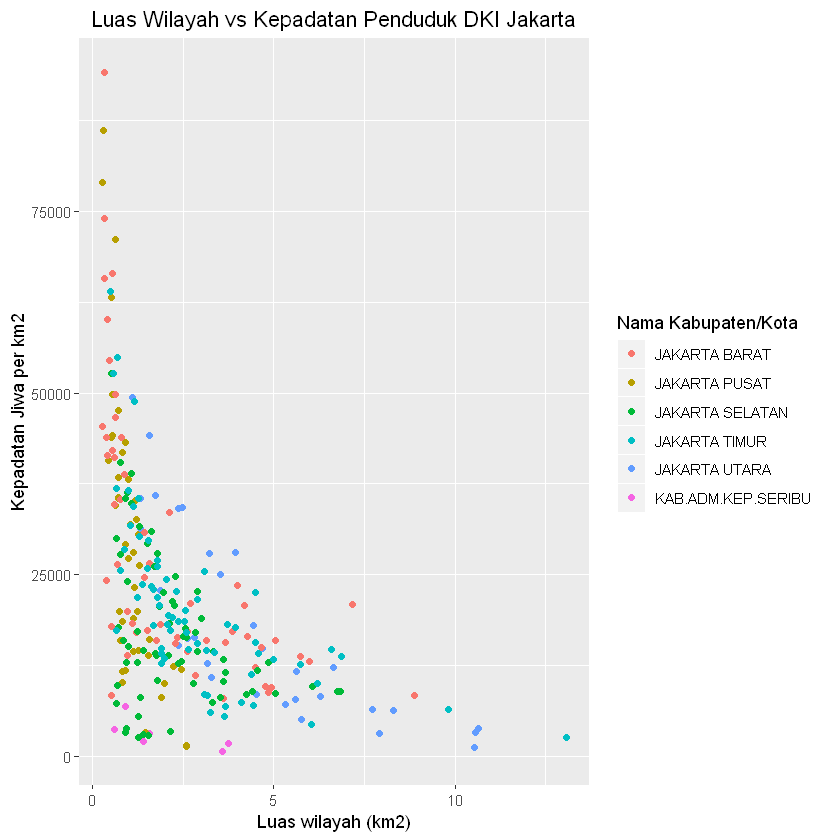

In [20]:
plot.dki + geom_point() + 
    theme(plot.title = element_text(hjust=0.5))  +
    labs(title = "Luas Wilayah vs Kepadatan Penduduk DKI Jakarta", x = "Luas wilayah (km2)", y = "Kepadatan Jiwa per km2", color = "Nama Kabupaten/Kota")

### Histogram
To produce a histogram, we use the geom_histogram function to add it to the plot.

This histogram layer requires a bin type stat, i.e. divides the data into intervals. However, with the use of geom_histogram, this stat has been bin by default so there is no need to specify.

By default geomogram histogram does not require aesthetic mapping for the y axis, just use the x axis.

But there are parameters that need to be inputted, namely the magnitude of the bin interval. This uses the binwidth parameter.



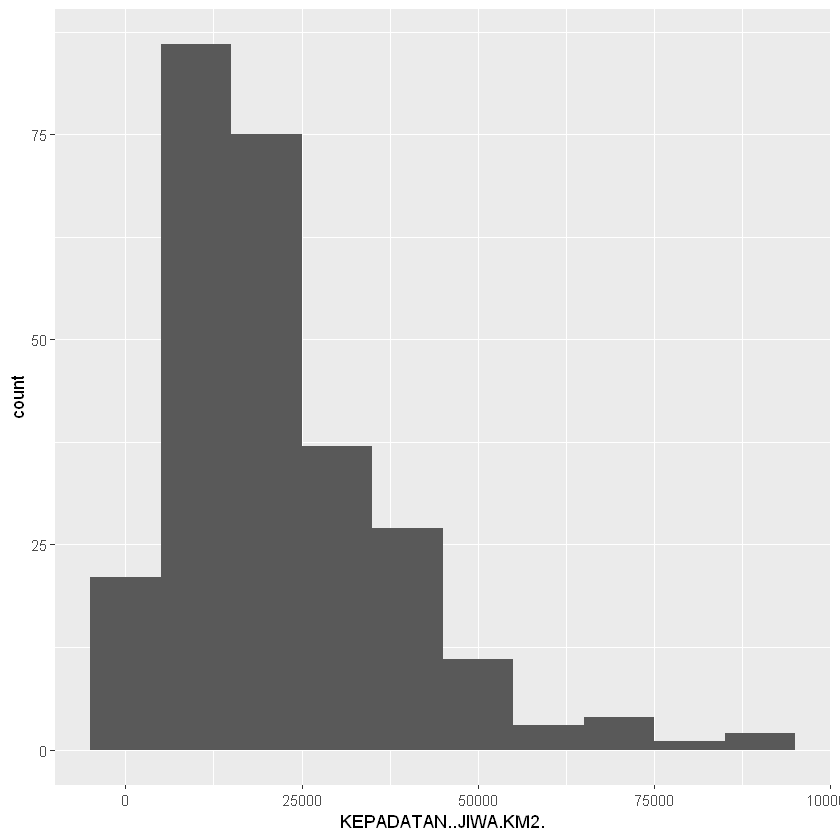

In [21]:
plot.dki <- ggplot(data=penduduk.dki, aes(x = KEPADATAN..JIWA.KM2.))
plot.dki + geom_histogram(binwidth=10000)

### Histogram + Aesthetic Fill

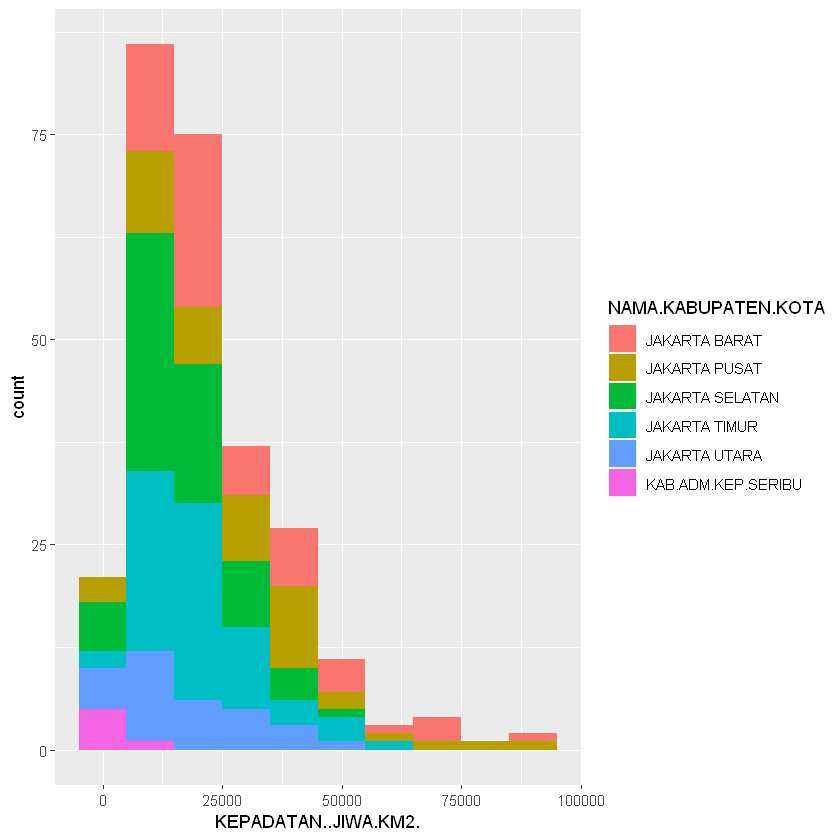

In [22]:
plot.dki <- ggplot(data=penduduk.dki, aes(x = KEPADATAN..JIWA.KM2., fill = NAMA.KABUPATEN.KOTA))

plot.dki + geom_histogram(binwidth = 10000)


### Line Chart

In [24]:
inflasi.indo.sing <- read.csv("C:\\Users\\aftermath\\Documents\\CS-101\\R\\asset\\inflasi.csv", sep=",")
head(inflasi.indo.sing,5)

Bulan,Negara,Inflasi
Jan-2017,Indonesia,0.0349
Feb-2017,Indonesia,0.0383
Mar-2017,Indonesia,0.0361
Apr-2017,Indonesia,0.0417
May-2017,Indonesia,0.0433


factor Bulan Column so the chart show X label in order

In [27]:
inflasi.indo.sing$Bulan  <- factor(inflasi.indo.sing$Bulan, levels = c("Jan-2017", "Feb-2017", "Mar-2017", "Apr-2017", "May-2017", "Jun-2017", "Jul-2017", "Aug-2017", "Sep-2017", "Oct-2017"))

str(inflasi.indo.sing)

'data.frame':	20 obs. of  3 variables:
 $ Bulan  : Factor w/ 10 levels "Jan-2017","Feb-2017",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Negara : Factor w/ 2 levels "Indonesia","Singapura": 1 1 1 1 1 1 1 1 1 1 ...
 $ Inflasi: num  0.0349 0.0383 0.0361 0.0417 0.0433 0.0437 0.0388 0.0382 0.0372 0.0358 ...


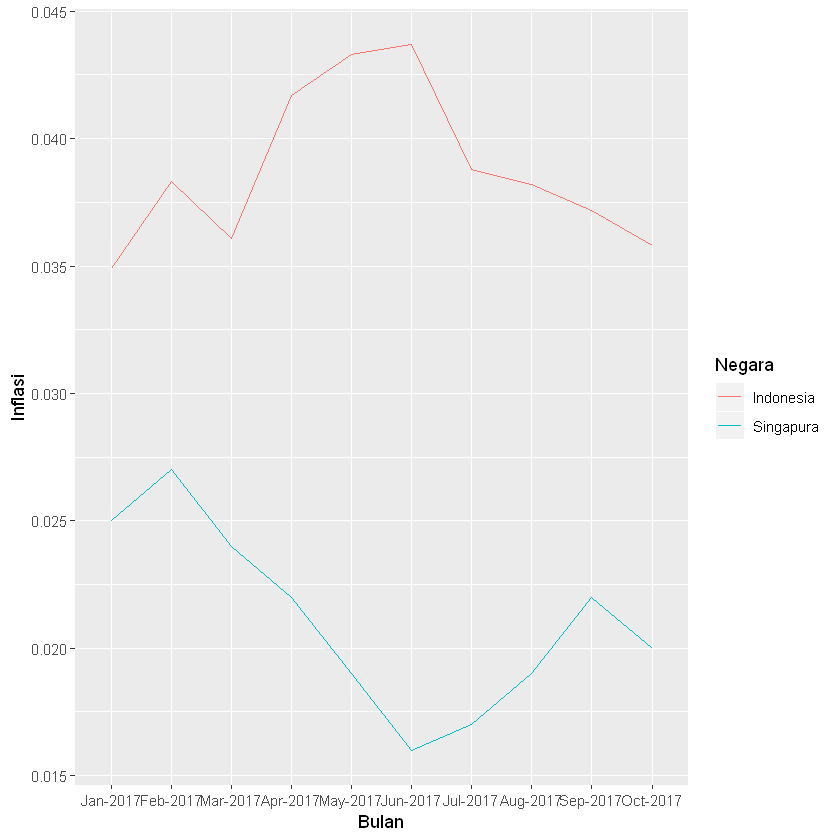

In [28]:
#group by negara or it will throw error (double y value for single x, so it must be grouped for R to be read properly)
plot.inflasi <- ggplot(data=inflasi.indo.sing, aes(x = Bulan,  y=Inflasi,  color=Negara, group=Negara)) 

plot.inflasi + geom_line()


### Line Chart + Data Labels

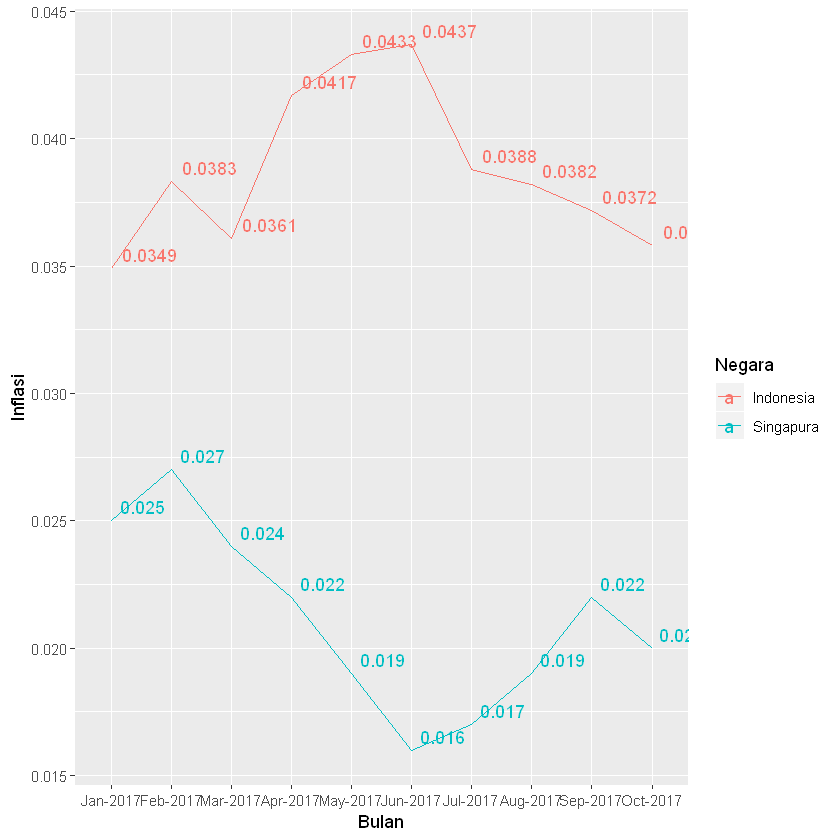

In [29]:
plot.inflasi + geom_line() + geom_text(aes(label=Inflasi),hjust=-0.2, vjust=-0.5)


### Bar Chart

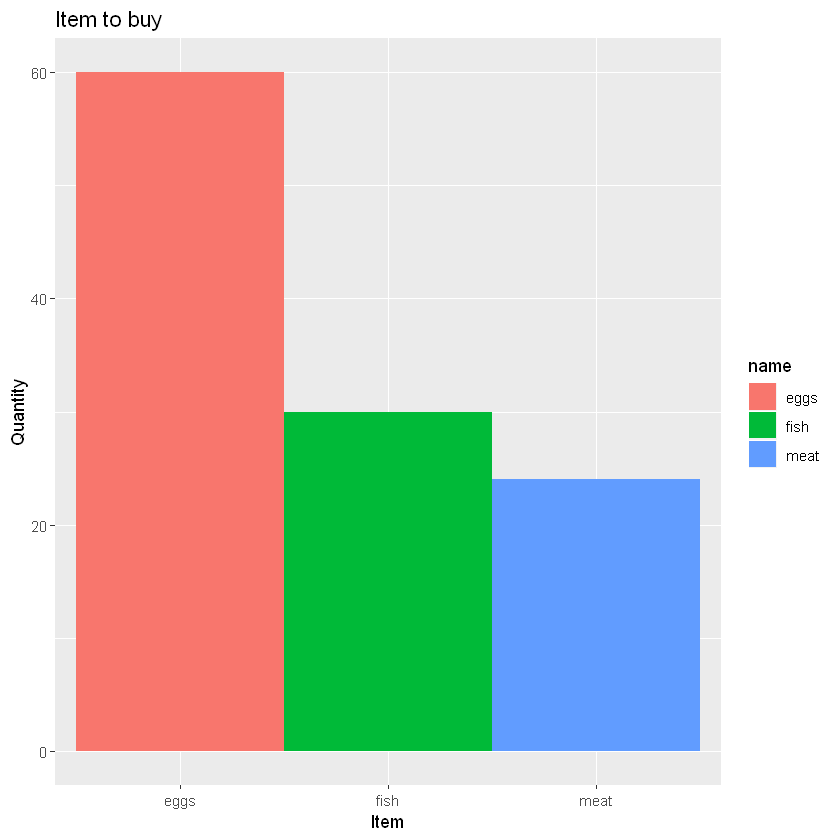

In [12]:
name <- c("fish","meat","eggs")
qty <- c(30,24,60)
dataframe <- data.frame(name, qty)

#Canvas
gambar <- ggplot(dataframe, aes(x=name, y=qty, fill=name)) 

#Bar Chart
gambar <- gambar + geom_bar(width=1, stat="identity")

#Graph Title
gambar <- gambar + ggtitle("Item to buy")

#Title X
gambar <- gambar + xlab("Item")

#Title Y
gambar <- gambar +ylab("Quantity")

#Menggambar grafik
gambar

### Bar Chart 2

Data dari dqlab

In [31]:
library(openxlsx)

In [32]:
mahasiswa <- read.xlsx("C:\\Users\\aftermath\\Documents\\CS-101\\R\\asset\\mahasiswa.xlsx", sheet = "Sheet 1")
head(mahasiswa,5)

ANGKATAN,Fakultas,Prodi,Kode,JUMLAH
2015,Bisnis,Akuntansi,AKUN,88
2016,Bisnis,Akuntansi,AKUN,85
2017,Bisnis,Akuntansi,AKUN,103
2016,Seni dan Desain,Arsitek,AR,28
2017,Seni dan Desain,Arsitek,AR,45


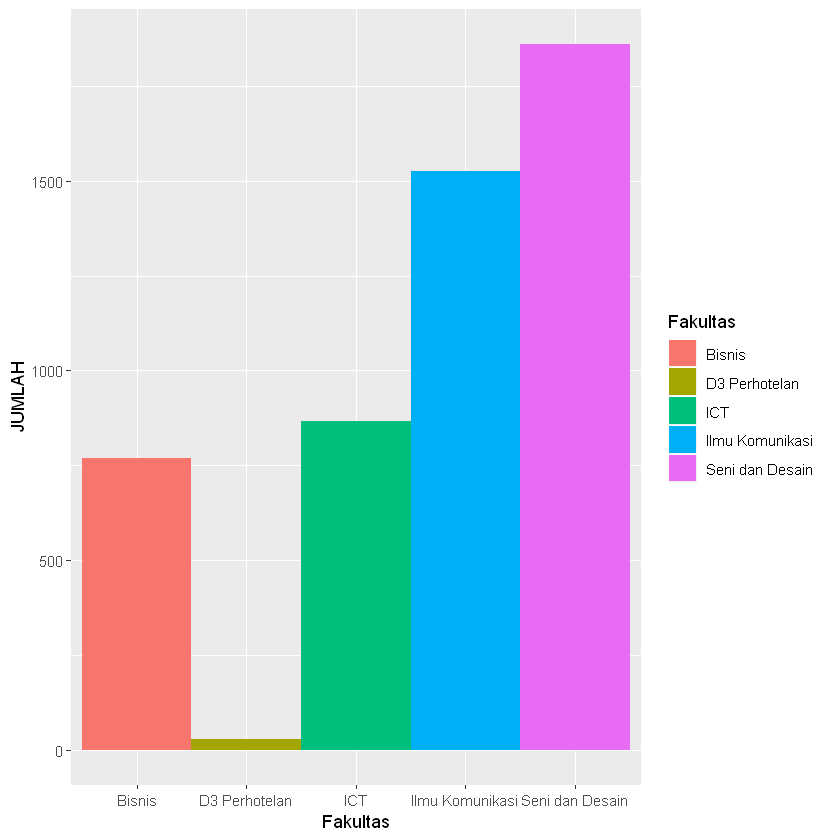

In [21]:
#Canvas
gambar <- ggplot(mahasiswa, aes(x=Fakultas, y=JUMLAH, fill=Fakultas))

#Bar chart
gambar <- gambar + geom_bar(width=1, stat="identity")

#Show graph
gambar

### Bar Chart 3

data dari dqlab, data dengan jumlah per fakultas per angkatan dikelompokkan

fakultas,tahun,jumlah_mahasiswa
Bisnis,2015,257
ICT,2015,249
Ilmu Komunikasi,2015,500
Seni dan Desain,2015,563
Bisnis,2016,248


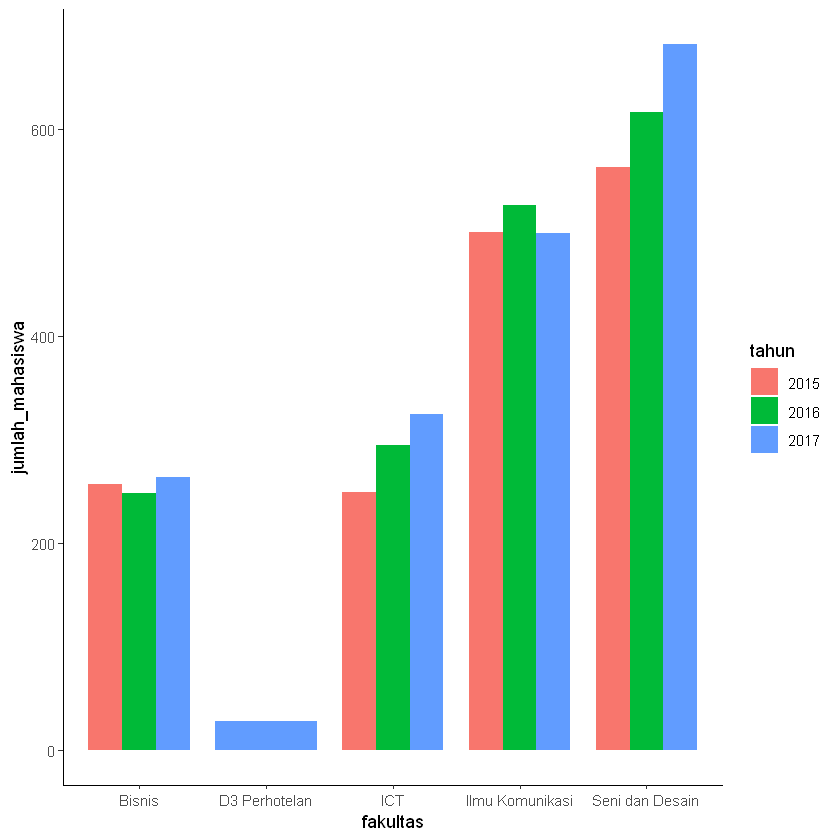

In [33]:
#Buat dataframe baru, agregate Jumlah Mahasiswa (dengan fungsi sum) berdasarkan kategori Fakultas dan Angkatan
summarybyfakultas <- aggregate(x=mahasiswa$JUMLAH, by=list(Kategori=mahasiswa$Fakultas, Tahun=mahasiswa$ANGKATAN), FUN=sum)

#Name dataframe column
summarybyfakultas <- setNames(summarybyfakultas, c("fakultas","tahun", "jumlah_mahasiswa"))

#Show dataframe
head(summarybyfakultas,5)

#Factorize year
summarybyfakultas$tahun = as.factor(summarybyfakultas$tahun)

#Plotting
ggplot(summarybyfakultas, aes(x=fakultas, y=jumlah_mahasiswa)) + 
  geom_bar(stat = "identity", aes(fill = tahun), width=0.8, position = position_dodge(width=0.8)) + 
  theme_classic() 

### Bar Chart 3 + Filtering

fakultas,tahun,jumlah_mahasiswa
Bisnis,2015,257
ICT,2015,249
Ilmu Komunikasi,2015,500
Seni dan Desain,2015,563
Bisnis,2016,248


,fakultas,tahun,jumlah_mahasiswa
2,ICT,2015,249
3,Ilmu Komunikasi,2015,500
6,ICT,2016,294
7,Ilmu Komunikasi,2016,526
11,ICT,2017,324
12,Ilmu Komunikasi,2017,499


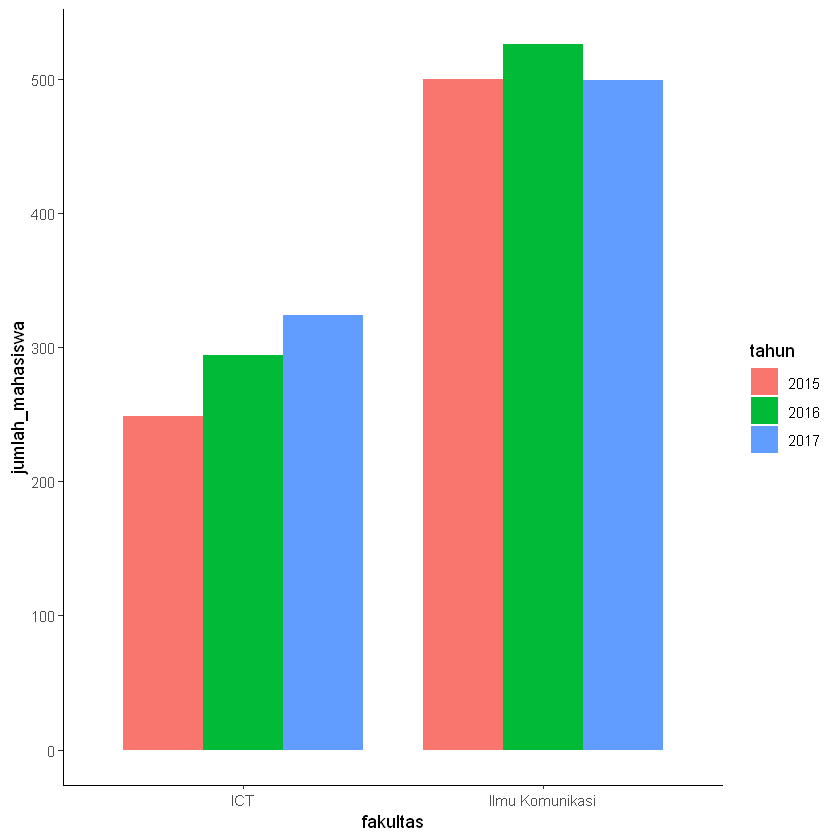

In [34]:
#Buat dataframe baru, agregate Jumlah Mahasiswa (dengan fungsi sum) berdasarkan kategori Fakultas dan Angkatan
summarybyfakultas <- aggregate(x=mahasiswa$JUMLAH, by=list(Kategori=mahasiswa$Fakultas, Tahun=mahasiswa$ANGKATAN), FUN=sum)

#Name dataframe column
summarybyfakultas <- setNames(summarybyfakultas, c("fakultas","tahun", "jumlah_mahasiswa"))

#Show dataframe
head(summarybyfakultas,5)

#Factorize year
summarybyfakultas$tahun = as.factor(summarybyfakultas$tahun)

#Filtering
summarybyfakultas[summarybyfakultas$fakultas %in% c("ICT", "Ilmu Komunikasi"),]

#Plotting
ggplot(summarybyfakultas[summarybyfakultas$fakultas %in% c("ICT", "Ilmu Komunikasi"),], aes(x=fakultas, y=jumlah_mahasiswa)) + 
  geom_bar(stat = "identity", aes(fill = tahun), width=0.8, position = position_dodge(width=0.8)) + 
  theme_classic() 

### Bar Chart 4 + Position Dodge

This bar chart has population information, with series based on gender and then categorized by district / city name.

To do this, there are two things we must do:

Aesthetic fill in the plot object needs to be inputted in the JENIS.KELAMIN column.
<pre>
    fill=JENIS.KELAMIN
</pre>
So that the data between Men and Women does not become a single bar, we fill the position in the layer with the dodge value - where objects are positioned side by side with other objects.
<pre>
    position = "dodge"
</pre>

In [36]:
penduduk.dki <- read.csv("C:\\Users\\aftermath\\Documents\\CS-101\\R\\asset\\datakependudukandki-dqlab.csv")
head(penduduk.dki,5)

TAHUN,NAMA.PROVINSI,NAMA.KABUPATEN.KOTA,NAMA.KECAMATAN,NAMA.KELURAHAN,LUAS.WILAYAH..KM2.,KEPADATAN..JIWA.KM2.,JENIS.KELAMIN,RENTANG.UMUR,JUMLAH
2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Laki-laki,35-39,5316
2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Perempuan,35-39,3221
2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Laki-laki,40-44,3137
2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Perempuan,40-44,6358
2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Laki-laki,45-49,3675


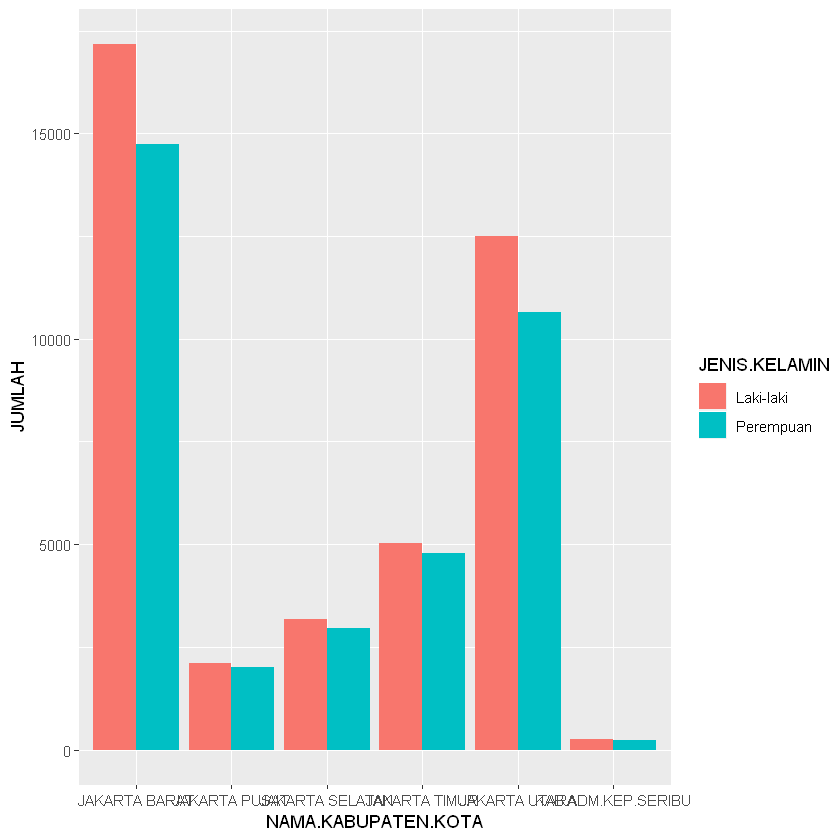

In [42]:
plot.dki <- ggplot(data=penduduk.dki, aes(x = NAMA.KABUPATEN.KOTA, y=JUMLAH, fill = JENIS.KELAMIN))
plot.dki + geom_bar(stat="identity", position = "dodge")

### Barchart 6 + Aggregate function
The data frame that we use in the plot often has to be summarized first so that it can be processed more easily by the ggplot layer.

The summary function that we can use is the aggregate function, which has at least three inputs as follows:

x: is a list of the column of data that we want to make a summary

FUN: function summary that we can use, for example sum, mean, and others

by: list contains the paired list of fields that we want to use



Warning message:
"position_dodge requires non-overlapping x intervals"

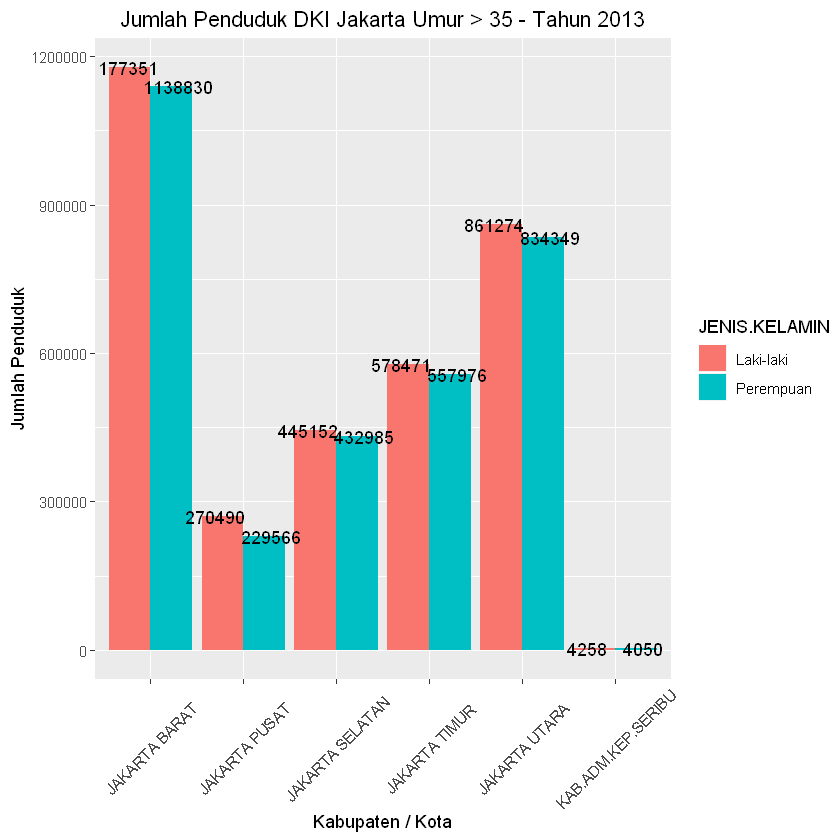

In [45]:
p <- aggregate(x=list(JUMLAH=penduduk.dki$JUMLAH), FUN=sum, 
    by = list(NAMA.KABUPATEN.KOTA=penduduk.dki$NAMA.KABUPATEN.KOTA, JENIS.KELAMIN=penduduk.dki$JENIS.KELAMIN))

#Plot grafik
plot.dki <- ggplot(data=p, aes(x = NAMA.KABUPATEN.KOTA, y=JUMLAH, fill=JENIS.KELAMIN, label = JUMLAH))
plot.dki <- plot.dki + geom_bar(stat="identity", position="dodge")  
plot.dki <- plot.dki + labs(title="Jumlah Penduduk DKI Jakarta Umur > 35 - Tahun 2013", x="Kabupaten / Kota", y="Jumlah Penduduk")

#Function to arrange text on graphics
#axis.text.x = element_text (angle = 45, vjust = 0.5))
#Rotate text data (axis.text.x) by 45 degrees to the left (angle = 45), and place text vertically in the middle (vjust = 0.5).
plot.dki <- plot.dki + theme(axis.text.x = element_text(angle=45,vjust = 0.5), plot.title = element_text(hjust=0.5))

#geom_text (position = position_dodge (1.2)) : Set the position of the text for the current data value above the plot bar
plot.dki <- plot.dki + geom_text(position = position_dodge(1.2))
plot.dki


### Pie Chart

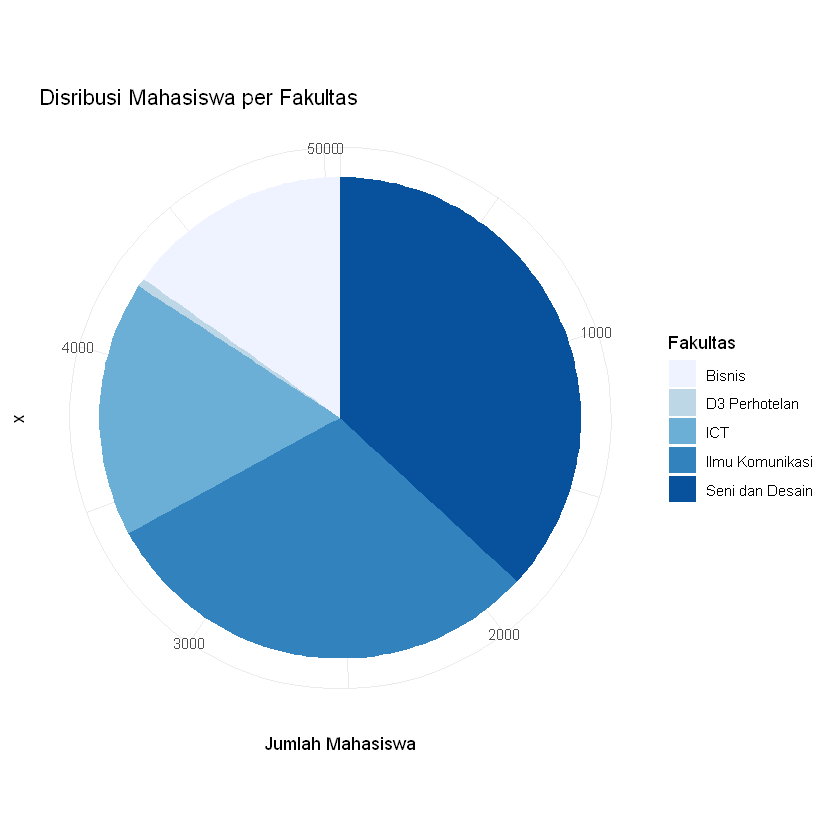

In [28]:
#Menghitung Jumlah berdasarkkan Fakultas
summarybyfakultas <- aggregate(x=mahasiswa$JUMLAH, by=list(Kategori=mahasiswa$Fakultas), FUN=sum)
summarybyfakultas <- setNames(summarybyfakultas, c("fakultas","jumlah_mahasiswa"))

#Canvas
piechart<- ggplot(summarybyfakultas, aes(x="", y=jumlah_mahasiswa, fill=fakultas))+ geom_bar(width = 1, stat = "identity")

#Set Pie Chart
piechart <- piechart + coord_polar("y", start=0)

#Set Chart Title
piechart <- piechart + ggtitle("Disribusi Mahasiswa per Fakultas")

#Colorize
piechart <- piechart + scale_fill_brewer(palette="Blues")+ theme_minimal()

#Show legend
piechart <- piechart + guides(fill=guide_legend(title="Fakultas"))

#Show y label
piechart <- piechart + ylab("Jumlah Mahasiswa") 

#Show chart
piechart


### Faceting 
Faceting on ggplot2 is:
<br>-the process of dividing a dataset into chunks of several subsets of data
<br>-and produce visualizations of the pieces
<br>-in order to make the data easier to understand

### Faceting : Scatter Plot

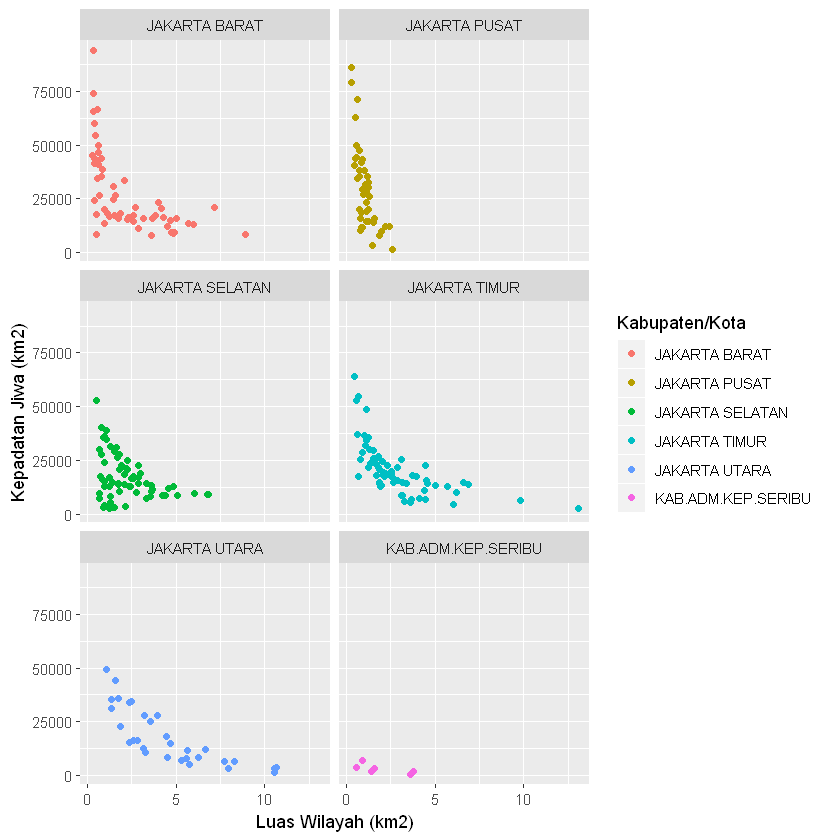

In [48]:
plot.dki <- ggplot(data=penduduk.dki, aes(x = LUAS.WILAYAH..KM2.,  y=KEPADATAN..JIWA.KM2.,  color=NAMA.KABUPATEN.KOTA))

#Menambahkan layer
plot.dki <- plot.dki + layer(geom = "point", stat="identity", position = "identity")
plot.dki <- plot.dki + labs(x="Luas Wilayah (km2)", y="Kepadatan Jiwa (km2)", color="Kabupaten/Kota")
plot.dki + facet_wrap( ~ NAMA.KABUPATEN.KOTA, ncol=2)

### Faceting : Histogram

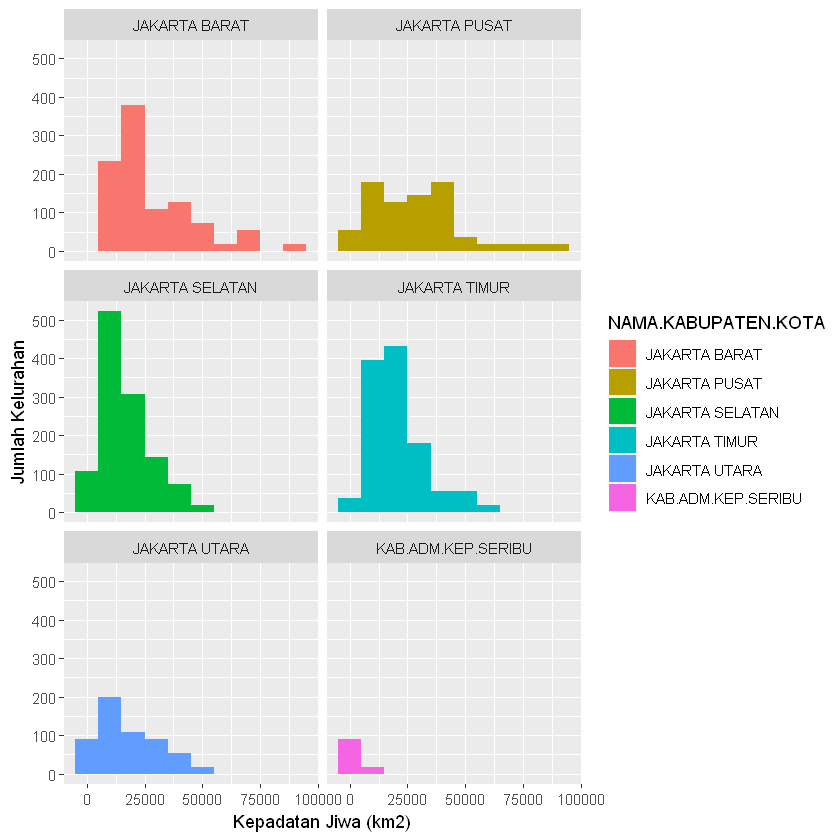

In [49]:
plot.dki <- ggplot(data=penduduk.dki, aes(x=KEPADATAN..JIWA.KM2.,  fill=NAMA.KABUPATEN.KOTA))

#Menambahkan layer
plot.dki <- plot.dki + geom_histogram(binwidth=10000)
plot.dki <- plot.dki + labs(x="Kepadatan Jiwa (km2)", y="Jumlah Kelurahan", color="Kabupaten/Kota")
plot.dki + facet_wrap(~ NAMA.KABUPATEN.KOTA, ncol=2)
